# Analyzing Historical Stock and Revenue Data for Tesla and GameStop

# Use yfinance to Extract Stock Data

In [1]:
import yfinance as yf
import pandas as pd

#Tesla stock data
tesla_ticker = "TSLA"
tesla_data = yf.Ticker(tesla_ticker).history(period="max")

# Reset
tesla_data.reset_index(inplace=True)

#first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Use Webscraping to Extract Tesla Revenue Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla revenue data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request and get response
html_data = requests.get(url).text

# Parse HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Locate the table with Tesla's revenue data
table = soup.find("table", {"class": "historical_data_table table"})

# Extract all rows from the table
rows = table.find("tbody").find_all("tr")

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through each row and extract data
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure row has two columns (Date and Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")  # Clean the revenue data
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Convert 'Date' to datetime format for better readability
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Display the last five rows
print(tesla_revenue.tail())


# Use yfinance to Extract Stock Data

In [13]:
import yfinance as yf
import pandas as pd

#GameStop stock data
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the DataFrame (optional)
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674835   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Use Webscraping to Extract GME Revenue Data

In [15]:

import requests
import pandas as pd
from bs4 import BeautifulSoup

# define the url for gamestop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# send an http request to fetch the webpage content
response = requests.get(url)

# check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("failed to retrieve the webpage")

# parse the html data using beautifulsoup
soup = BeautifulSoup(html_data, "html.parser")

# locate the table containing revenue data
table = soup.find("table", {"class": "historical_data_table"})

# initialize an empty dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# extract data from the table if found
if table:
    for row in table.find("tbody").find_all("tr"):
        col = row.find_all("td")
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        
        # append extracted data to the dataframe
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    # display the last five rows of the dataframe
    print(gme_revenue.tail())

else:
    print("revenue data table not found on the webpage")


         Date Revenue
0  2023-12-31   1.79B
1  2023-09-30   1.16B
2  2023-06-30   1.24B
3  2023-03-31   1.38B
4  2022-12-31   2.23B


# Plot Tesla Stock Graph

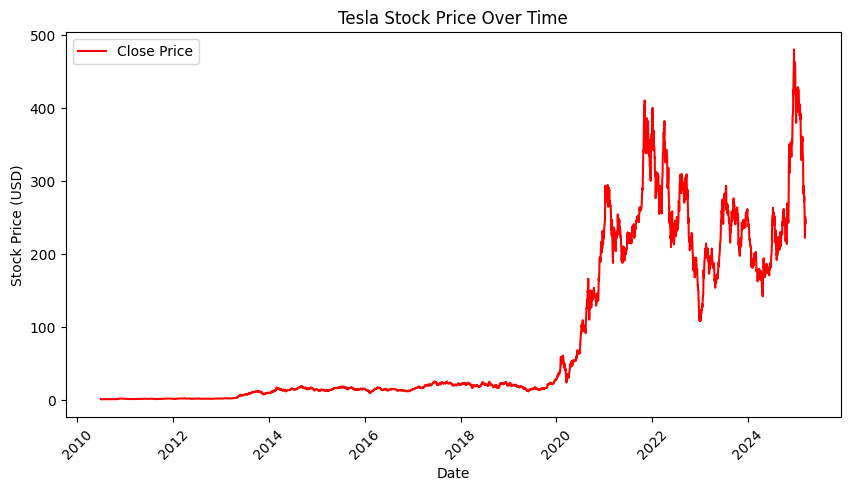

In [16]:
# import necessary libraries
import matplotlib.pyplot as plt

# function to create and display the stock graph
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# plot tesla stock graph
make_graph(tesla_data, "Tesla Stock Price Over Time")


# Plot GameStop Stock Graph

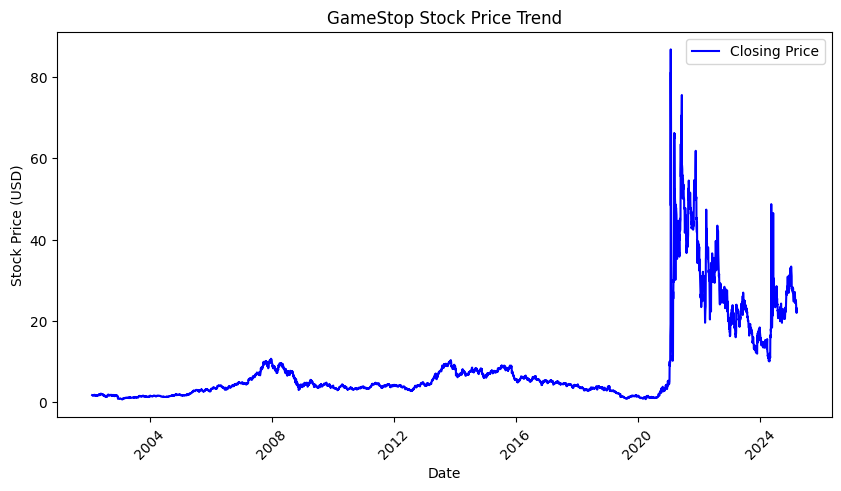

In [17]:
import matplotlib.pyplot as plt

# function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# plot GameStop stock data
make_graph(gme_data, "GameStop Stock Price Trend")


# Authur 
## Muhammad Abdullah Wali